In [2]:
#Loading libraries required
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

#Model library
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 

#Notebook visualization configs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', 500)

### Objective: Can we predict the motor speed based on the other variables relationship? What is the best algorithm that can predict without overfitting?

In [3]:
df = pd.read_csv('../electric-motor-temp/data/electric-motor-temperature.zip' , compression = 'zip')

In [4]:
df.head(10)

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4
5,-0.762936,-1.116955,0.334901,-1.303017,-1.222429,-0.248197,1.031031,-0.246341,-2.522203,-1.831931,-2.062549,-2.017884,4
6,-0.749228,-1.116170,0.335014,-1.302082,-1.222430,-0.247914,1.030493,-0.246162,-2.522538,-1.833012,-2.062115,-2.017243,4
7,-0.738450,-1.113986,0.336256,-1.305155,-1.222432,-0.248321,1.030107,-0.246035,-2.522844,-1.832182,-2.061953,-2.017213,4
8,-0.730910,-1.111828,0.334905,-1.303790,-1.222432,-0.247785,1.029851,-0.245981,-2.522808,-1.831576,-2.062443,-2.017739,4
9,-0.727130,-1.109486,0.335988,-1.305633,-1.222431,-0.248294,1.029636,-0.245888,-2.522677,-1.831438,-2.062317,-2.018180,4


##### dataset it's seems to be numerical for all columns, except the profile id which is categorical, however a motor speed will not variarte due to a profile.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998070 entries, 0 to 998069
Data columns (total 13 columns):
ambient           998070 non-null float64
coolant           998070 non-null float64
u_d               998070 non-null float64
u_q               998070 non-null float64
motor_speed       998070 non-null float64
torque            998070 non-null float64
i_d               998070 non-null float64
i_q               998070 non-null float64
pm                998070 non-null float64
stator_yoke       998070 non-null float64
stator_tooth      998070 non-null float64
stator_winding    998070 non-null float64
profile_id        998070 non-null int64
dtypes: float64(12), int64(1)
memory usage: 99.0 MB


###### all columns without nulls

In [6]:
df.describe()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
count,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000
mean,-0.003905,0.004723,0.004780,-0.005690,-0.006336,-0.003333,0.006043,-0.003194,-0.004396,0.000609,-0.002208,-0.003935,50.732001
std,0.993127,1.002423,0.997878,1.002330,1.001229,0.997907,0.998994,0.997912,0.995686,1.001049,0.999597,0.998343,22.073125
min,-8.573954,-1.429349,-1.655373,-1.861463,-1.371529,-3.345953,-3.245874,-3.341639,-2.631991,-1.834688,-2.066143,-2.019973,4.000000
25%,-0.599385,-1.037925,-0.826359,-0.927390,-0.951892,-0.266917,-0.756296,-0.257269,-0.672308,-0.747265,-0.761951,-0.725622,32.000000
50%,0.266157,-0.177187,0.267542,-0.099818,-0.140246,-0.187246,0.213935,-0.190076,0.094367,-0.057226,0.005085,0.006536,56.000000
75%,0.686675,0.650709,0.358491,0.852625,0.853584,0.547171,1.013975,0.499260,0.680691,0.697344,0.772239,0.725660,68.000000
max,2.967117,2.649032,2.274734,1.793498,2.024164,3.016971,1.060937,2.914185,2.917456,2.449158,2.326668,2.653781,81.000000


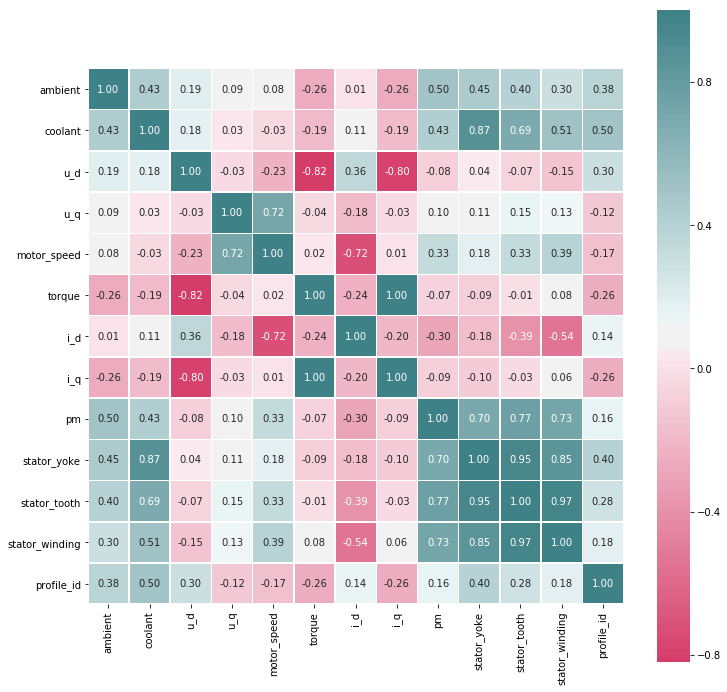

In [7]:
f,ax=plt.subplots(figsize=(12,12))
corr=df.corr()

sns.heatmap(corr, annot=True, linewidths=.5, fmt='.2f', mask= np.zeros_like(corr,dtype=np.bool), cmap=sns.diverging_palette(0,200,as_cmap=True), 
            square=True, ax=ax)

plt.show()

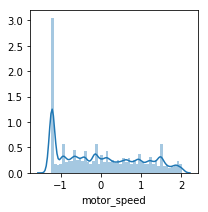

In [8]:
f,ax=plt.subplots(figsize=(3,3))
sns.distplot(df['motor_speed'])
plt.show()

In [9]:
#  this shows a highly skewed data at the motor speed, we will deal later with this

In [10]:
feature_list = list(df.drop(['motor_speed','profile_id'], axis = 1).columns)

In [11]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize = (10,10))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.distplot(df[var_name])
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

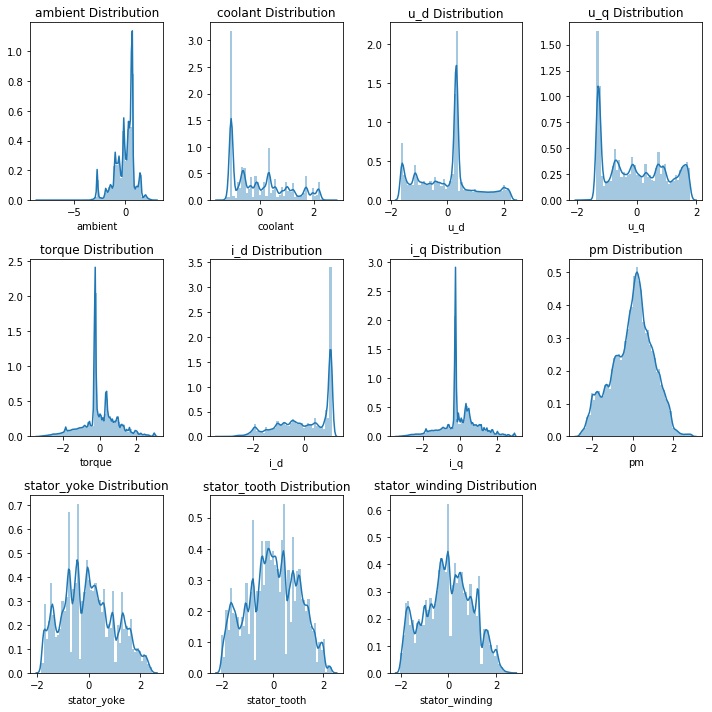

In [12]:
draw_histograms(df, feature_list, 3, 4)

In [13]:
df=df.drop(['profile_id'],axis=1) # Dropping profile_id since is irrelevant

#### Pre processing variables
###### For LR, SVM, NN we will change some of the scale of the features / estimator. 

In [14]:
scaler_method = [StandardScaler(), MinMaxScaler()]

In [15]:
def addScalingMethods(scaler_method, df):
    initial_columns =  df.columns
    original_df = df
    for i in scaler_method:
        temp = pd.DataFrame()
        scaler = i
        scaler.fit(original_df)
        temp = pd.DataFrame(scaler.transform(original_df), 
                            columns= str(i)[:str(i).find('(')] +'_'+ initial_columns)
        df = df.merge(temp, how = 'inner', left_index= True, right_index = True)
    return df

In [16]:
new_df = addScalingMethods(scaler_method, df)

In [17]:
y = new_df.iloc[:, range(4,new_df.shape[1],12)]
not_y = list(y.columns)

In [18]:
X = new_df.drop(not_y, axis = 1)

# Linear regression

In [41]:
from sklearn import linear_model

def LinearRegression(X,y):
    # Creating linear regression as baseline for further models - using all the starting parameters
    for i in range(11,X.shape[1]+11,11):
        start_x = int(i - 11)
        end_x  = i
        start_y = int((i/11)-1)
        
        print(start_x , end_x)
        
        #split into train, test, validation
        X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(X.iloc[:,start_x:end_x]), y.iloc[:,int(start_y)], test_size=0.2, random_state=1)
        print (X_train.shape, y_train.shape)
        print (X_test.shape, y_test.shape)        
        
        # fit a model
        lm = linear_model.LinearRegression()
        model = lm.fit(X_train, y_train)
        validation_predictions = lm.predict(X_test)
        
        string_col = str(X_train.columns[0])
        if string_col.find('_') == -1:
            text = 'original'
        else:
            text = string_col[:string_col.find('_')]
        
        print("Intercept : {}".format(lm.intercept_))
        print("b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11 : {}".format(lm.coef_))
        print ("Score {}:".format(text) + "{0:.3%}".format(model.score(X_test, y_test))) # R2 score
        print("\n")


In [42]:
LinearRegression(X,y)

0 11
(798456, 11) (798456,)
(199614, 11) (199614,)
Intercept : 0.0006489958381304386
b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11 : [-0.05023833  0.41102112 -0.16584903  0.53967713 -0.34327903 -0.65839152
  0.1375665   0.10669572 -1.6279862   2.31558749 -1.16714363]
Score original:92.775%


11 22
(798456, 11) (798456,)
(199614, 11) (199614,)
Intercept : 3.918129895643394e-06
b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11 : [-0.04983177  0.41151132 -0.16529393  0.54027053 -0.34213981 -0.65692184
  0.13711073  0.10610503 -1.6276933   2.31181353 -1.16377873]
Score StandardScaler:92.775%


22 33
(798456, 11) (798456,)
(199614, 11) (199614,)
Intercept : 1.0574044269137357
b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11 : [-0.17074691  0.49365506 -0.19195037  0.58088264 -0.6432437  -0.83504833
  0.25343625  0.17436861 -2.05379045  2.99554124 -1.6064296 ]
Score MinMaxScaler:92.775%




### Random forest regression

In [44]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [47]:
def rfr_model(X, y):
    # Perform Grid-Search
    gsc = GridSearchCV(estimator=RandomForestRegressor(),
                       param_grid={'max_depth': range(3,7),
                                   'n_estimators': (10, 50, 100, 1000),
                                  },
                       cv=5,
                       scoring='neg_mean_squared_error',
                       verbose=0,
                       n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],                               random_state=False, verbose=False)
    # Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')
    predictions = cross_val_predict(rfr, X, y, cv=10)

    return scores, predictions

In [ ]:
rfr_model(X.iloc[:,0:11],y.iloc[:,0])

In [96]:
#split into train, test, validation
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(X.iloc[:,0:11]), y.motor_speed, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

print (X_train.shape, y_train.shape)
print (X_val.shape, y_val.shape)
print (X_test.shape, y_test.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
validation_predictions = lm.predict(X_val)

print ("Score: {0:.2%}".format(model.score(X_val, y_val)))